In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [2]:
seed = 18

In [3]:
#导入数据
data = pd.read_csv('pima-indians-diabetes.csv')
data.head(3).append(data.tail(3))

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Serum insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Serum insulin,BMI,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#分离特征和标签
dataset = data.values
X = dataset[:,0:-1]
y = dataset[:,-1]

In [6]:
# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=seed)

In [7]:
#训练模型
watchlist_sklearn= [(X_train,y_train),(X_test,y_test)]
#建立分类模型，传递给XGBClassifier()函数相关参数
xgb_params_sklearn = {
    "n_estimators": 1000, #基础模型的数量
    "booster": "gbtree",  #基础模型的类型
    "objective": "binary:logistic",#二分类问题
    "seed": seed,         #随机种子
    "learning_rate": 0.1, #学习率 
    "gamma": 0.1,         # 用于控制是否后剪枝的参数,越大越保守
    "colsample_bytree": 0.8,# 生成模型时进行的列采样 
    "subsample": 0.8,       # 随机采样训练样本 
    "max_depth": 3,         # 构建模型的深度，越大越容易过拟合
    "min_child_weight": 1,  #最小叶子节点样本权重之和
    "eval_metric": "auc",   #模型训练的损失函数为AUC
    "nthread": 4,           # CPU线程数
}
model = XGBClassifier(**xgb_params_sklearn,use_label_encoder=False)
model.fit(X_train, y_train, eval_set=watchlist_sklearn, \
                  eval_metric="auc", verbose=10, \
                  early_stopping_rounds=500) 


[0]	validation_0-auc:0.84108	validation_1-auc:0.69325
[10]	validation_0-auc:0.90079	validation_1-auc:0.76720
[20]	validation_0-auc:0.91318	validation_1-auc:0.78539
[30]	validation_0-auc:0.92296	validation_1-auc:0.79066
[40]	validation_0-auc:0.93507	validation_1-auc:0.77992
[50]	validation_0-auc:0.94092	validation_1-auc:0.78255
[60]	validation_0-auc:0.94712	validation_1-auc:0.78667
[70]	validation_0-auc:0.95595	validation_1-auc:0.78321
[80]	validation_0-auc:0.96060	validation_1-auc:0.78181
[90]	validation_0-auc:0.96662	validation_1-auc:0.78255
[100]	validation_0-auc:0.97117	validation_1-auc:0.78066
[110]	validation_0-auc:0.97613	validation_1-auc:0.77737
[120]	validation_0-auc:0.97919	validation_1-auc:0.77827
[130]	validation_0-auc:0.98228	validation_1-auc:0.78008
[140]	validation_0-auc:0.98512	validation_1-auc:0.77877
[150]	validation_0-auc:0.98663	validation_1-auc:0.77753
[160]	validation_0-auc:0.98883	validation_1-auc:0.77564
[170]	validation_0-auc:0.99062	validation_1-auc:0.77399
[18

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=18, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=18, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [8]:
#预测模型
y_pred = model.predict(X_test)
# 评估结果
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy: %.4f" % accuracy)
from sklearn import metrics
predprob_test = model.predict_proba( X_test )[:,1]
print ("AUC: %.4f" % metrics.roc_auc_score(y_test, predprob_test))

Accuracy: 0.7229
AUC: 0.7907


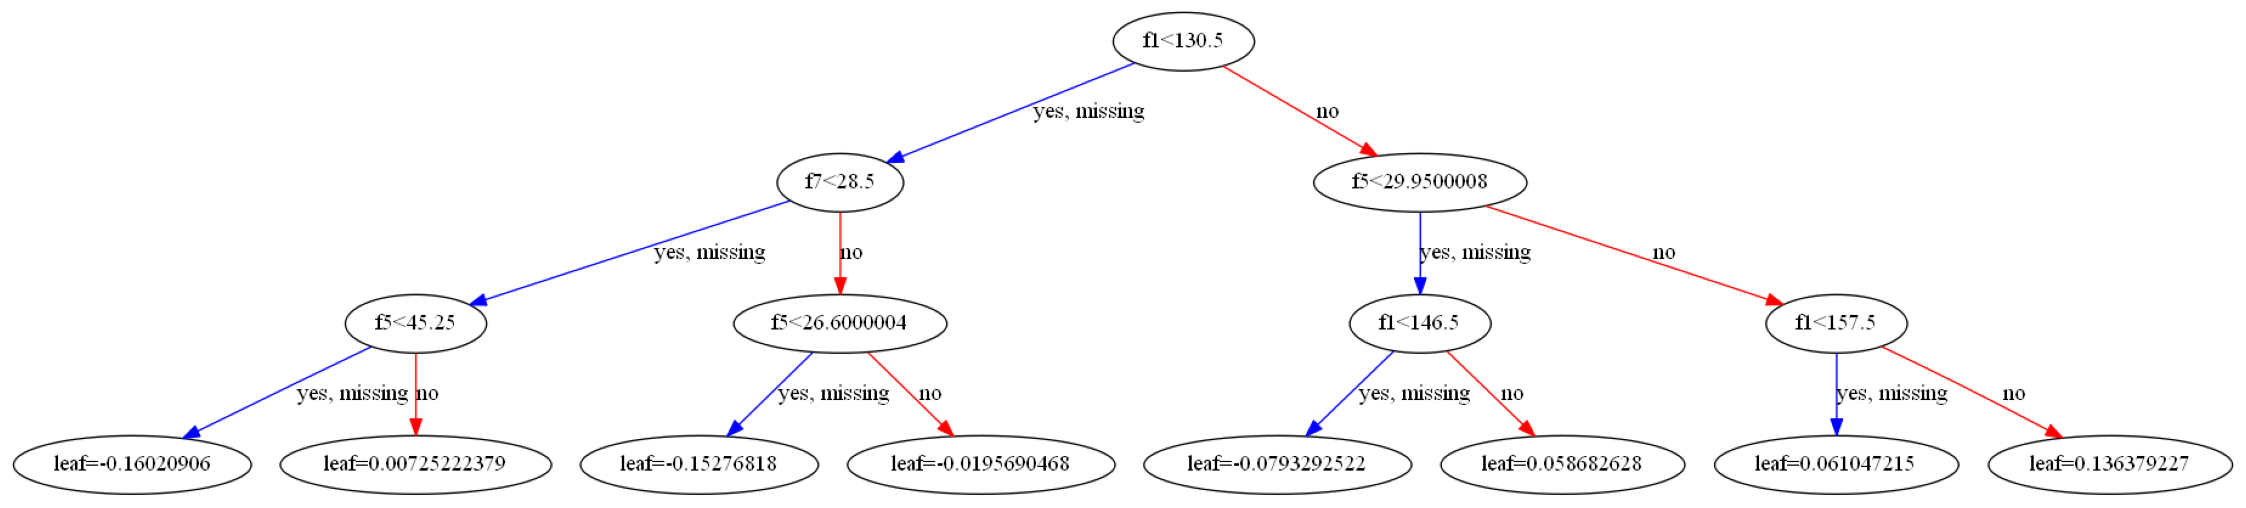

In [9]:
from xgboost import plot_tree
plt.rcParams["figure.figsize"] = [40,20]
plot_tree(model, num_trees = 1)
plt.show()

In [10]:
#保存模型
import pickle
pickle.dump(model, open("pima.dat", "wb"))

In [11]:
# 加载模型
pima_model = pickle.load(open("pima.dat", "rb"))